In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

# 分類数設定

In [3]:
NUM_CLASSES = 62

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │            55 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,125 (4.39 KB)

 Trainable params: 1,125 (4.39 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 8s 314ms/step - accuracy: 0.1953 - loss: 1.7962
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1816 - loss: 1.7223 - val_accuracy: 0.2240 - val_loss: 1.5086
Epoch 2/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2266 - loss: 1.5925
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2583 - loss: 1.5356 - val_accuracy: 0.3474 - val_loss: 1.4321
Epoch 3/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3203 - loss: 1.4536
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3366 - loss: 1.4471 - val_accuracy: 0.4091 - val_loss: 1.3713
Epoch 4/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3359 - loss: 1.3794
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras


Epoch 109/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.5373 - accuracy: 0.7969
Epoch 00109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4198 - accuracy: 0.8379 - val_loss: 0.1955 - val_accuracy: 0.9659
Epoch 110/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.3872 - accuracy: 0.8281
Epoch 00110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4077 - accuracy: 0.8505 - val_loss: 0.2020 - val_accuracy: 0.9614
Epoch 111/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.3474 - accuracy: 0.8828
Epoch 00111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4132 - accuracy: 0.8433 - val_loss: 0.1984 - val_accuracy: 0.9632
Epoch 112/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.4205 

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9492 - loss: 0.2612


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[5.2021891e-03 8.5793406e-01 1.3611943e-01 3.1951806e-04 4.2480757e-04]
1


# 混同行列

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step


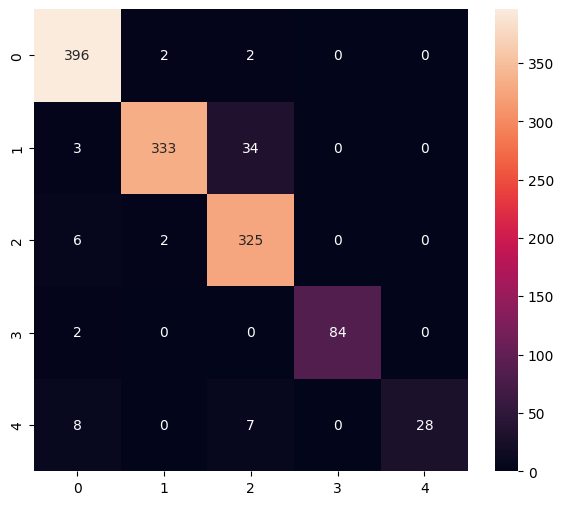

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       400
           1       0.99      0.90      0.94       370
           2       0.88      0.98      0.93       333
           3       1.00      0.98      0.99        86
           4       1.00      0.65      0.79        43

    accuracy                           0.95      1232
   macro avg       0.97      0.90      0.92      1232
weighted avg       0.95      0.95      0.95      1232



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [22]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Export as SavedModel first
model.export('temp_model')

# Convert from SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model('temp_model')
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

# Save the model
open(tflite_save_path, 'wb').write(tflite_quantized_model)

# Clean up temporary files
import shutil
shutil.rmtree('temp_model')

INFO:tensorflow:Assets written to: temp_model/assets


INFO:tensorflow:Assets written to: temp_model/assets


Saved artifact at 'temp_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  13106226832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13106229904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13106227024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13106231248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13106230864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13106226448: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1750269375.191047 22378879 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1750269375.191097 22378879 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.
2025-06-18 13:56:15.191557: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: temp_model
2025-06-18 13:56:15.191848: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2025-06-18 13:56:15.191852: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: temp_model
2025-06-18 13:56:15.195361: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2025-06-18 13:56:15.195795: I tensorflow/cc/saved_model/loader.cc:234] Restoring SavedModel bundle.
2025-06-18 13:56:15.211402: I tensorflow/cc/saved_model/loader.cc:218] Running initialization op on SavedModel bundle at path: temp_model
2025-06-18 13:56:15.218689: I tensorflow/cc/saved_model/loader.cc:317] SavedModel

# 推論テスト

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [ ]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))